<a href="https://colab.research.google.com/github/Rachel1809/Titanic-Kaggle/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%cd /content/drive/MyDrive/ColabNotebooks/Titanic/

/content/drive/MyDrive/ColabNotebooks/Titanic


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/ColabNotebooks/Titanic/"

# Data exploration

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train_data = pd.read_csv('train.csv', index_col="PassengerId")
test_index = pd.read_csv('test.csv')["PassengerId"]
test_data = pd.read_csv('test.csv', index_col="PassengerId")
train_df = train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- `Survived`: Survival (0 = No, 1 = Yes)
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Sex`: Sex 
- `Age`: Age in years
- `Sibsp`: number of siblings (brother, sister, stepbrother, stepsister) / spouses (husband, wife (mistresses and fiancés were ignored)) aboard the Titanic.
- `Parch`: number of parents (mother, father) / children (daughter, son, stepdaughter, stepson) aboard the Titanic.
- `Ticket`: Ticket number
- `Fare`: Passenger fare
- `Cabin`: Cabin number
- `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [7]:
converted_features = ["Pclass", "SibSp", "Parch", "Embarked"]
train_data["Survived"] = train_data["Survived"].astype('category')
def convert(df, features):
  for feature in features: 
    df[feature] = df[feature].astype('category')

convert(train_data, converted_features)
convert(test_data, converted_features)

- Categorical: `Survived`, `Pclass`, `Embarked`, `SibSp`, `Parch`

- Numerical: `Age`, `Fare`

- Mix type: `Ticket`, `Cabin`

In [33]:
train_data.loc[train_data['Survived'] == 1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


- `Age`, `Fare`, `Cabin`, `Embarked` has missing value

In [9]:
train_data.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [10]:
train_data.describe(include='category')

,Survived,Pclass,SibSp,Parch,Embarked
count,891,891,891,891,889
unique,2,3,7,7,3
top,0,3,0,0,S
freq,549,491,608,678,644


# Exploratory Data Analysis

## Categorical features
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`, `SibSp`, `Parch`

**Target value: `Survived`**

In [11]:
train_data['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [12]:
train_data['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only $38\%$ of people survived from the disaster. Therefore, the training data deals with data imbalance but it not severe which is wht I will not consider techniques like sampling to tackle this.

**`Sex`**

In [13]:
train_data['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [14]:
train_data['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


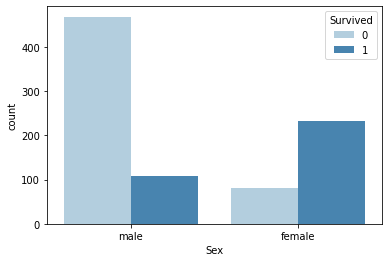

In [15]:
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='Blues')

Although there are more male in the Titanic than female, the rate of survival of female is larger than that of male.

**Remaining categorical feature columns**

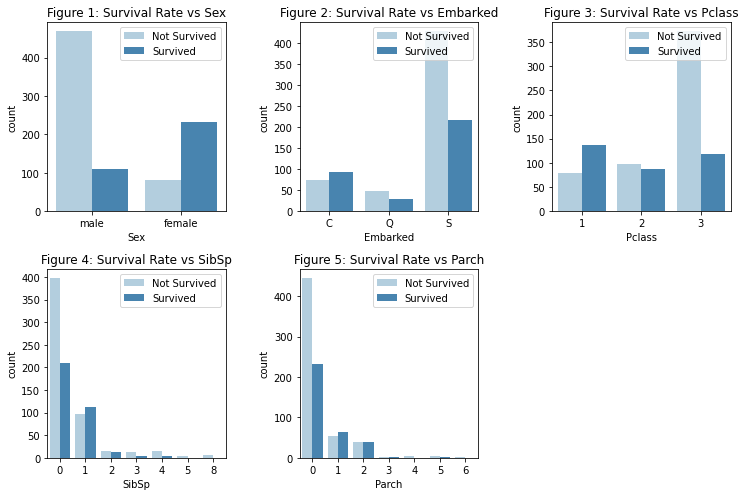

In [16]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2 
n_cols = 3 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
  for c in range (0, n_cols):
    i = r*n_cols + c
    if i < len(cols):
      ax_i = ax[r, c]
      sns.countplot(data=train_data, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
      ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

**Observation:**
- Survival Rate:

  - Fig 1: Female > male
  - Fig 2: Most People embarked on Southampton, and also had the highest people not suvived.
  - Fig 3: 1st class higher survival rate
  - Fig 4: People going with 0 `SibSp` are mostly not survived and the difference in rate between survived and not survived is biggest. The number of passenger with 1-2 family members has a better chance of survival.
  - Fig 5: People with 0 `Parch` are mostly not survived.

## Numerical Features

- Numerical Features: `Age`, `Fare`

**Age**

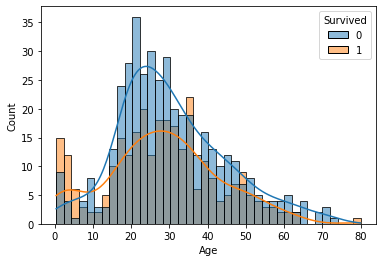

In [17]:
sns.histplot(data = train_data, x='Age', hue='Survived', bins=40, kde=True)

- Majorty passengers were from 18-40 years old.
- Children had more chance to survive than any other ages.

**Fare**

In [18]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

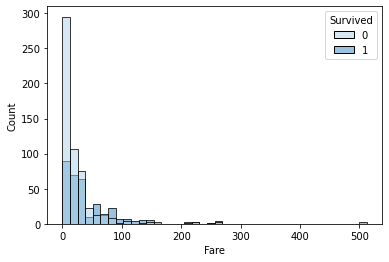

In [19]:
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=40, palette='Blues')

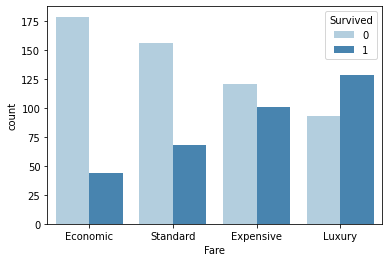

In [20]:
# To name for quartile, 0-25, 25-50, 50-75, 75-100

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_data['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_data['Survived'], palette='Blues')

- Distribution of fare:
  
  - Fare does not follow a normal distribution and has a huge spike at the price range `[$0 - $100]`.
  - The distribution is skewed to the left with `75%` of fare paid under `$31` and a max paid fare of `$512`.

- Quartile plot:
  - Passenger with Luxury and Expensive Fare will have more chance to survived


- The lower the `Pclass` (the upper class) is, the higher `Survived` rate is.
- The higher the `Fare` price is, the higher `Survived` rate is.


# Data pre-processing

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), object(4)
memory usage: 86.4+ KB


In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

def one_hot_encoding(data, cols, isTest=False):
  if (isTest):
    result = ohe.transform(pd.DataFrame(data[cols]))
    print(result)
  else:
    result = ohe.fit_transform(pd.DataFrame(data[cols]))
  OH_col = pd.DataFrame(result, columns=ohe.get_feature_names_out(), index=data.index)
  remain_data = data.drop(cols, axis=1)
  data = pd.concat([remain_data, OH_col], axis=1)
  return data

def impute_data(data, cols, strategy):
  imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
  data[cols] = imputer.fit_transform(data[cols])
  return data

def standard_scaler(data, cols, isTest=False):
  if (isTest):
    data[cols] = scaler.transform(data[cols])
  else:
    data[cols] = scaler.fit_transform(data[cols])
  return data

def clean(data, isTest=False):
  data['Cabin'] = data['Cabin'].astype('str').str[0]
  data = data.drop(["Ticket", "Name"], axis=1)

  cate_cols = ["Pclass", "SibSp", "Parch"]
  for col in cate_cols:
    data[col] = data[col].astype('int64')

  num_cols = ["Fare", "Age"]
  label_cols = ["Sex", "Embarked", "Cabin"]

  data = one_hot_encoding(data, label_cols, isTest)
  data = impute_data(data, num_cols, 'mean')
  data = impute_data(data, cate_cols, 'median')
  data = standard_scaler(data, num_cols, isTest)

  return data


train_df = clean(train_data, isTest=False)

In [9]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3.0,-0.592481,1.0,0.0,-0.502445,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1.0,0.638789,1.0,0.0,0.786845,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3.0,-0.284663,0.0,0.0,-0.488854,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1.0,0.407926,1.0,0.0,0.420730,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,3.0,0.407926,0.0,0.0,-0.486337,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    float64
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    float64
 4   Parch         891 non-null    float64
 5   Fare          891 non-null    float64
 6   Sex_female    891 non-null    float64
 7   Sex_male      891 non-null    float64
 8   Embarked_C    891 non-null    float64
 9   Embarked_Q    891 non-null    float64
 10  Embarked_S    891 non-null    float64
 11  Embarked_nan  891 non-null    float64
 12  Cabin_A       891 non-null    float64
 13  Cabin_B       891 non-null    float64
 14  Cabin_C       891 non-null    float64
 15  Cabin_D       891 non-null    float64
 16  Cabin_E       891 non-null    float64
 17  Cabin_F       891 non-null    float64
 18  Cabin_G       891 non-null    

In [10]:
test_df = clean(test_data, isTest=True)
test_df.shape

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]]


(418, 20)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    float64
 3   Parch         418 non-null    float64
 4   Fare          418 non-null    float64
 5   Sex_female    418 non-null    float64
 6   Sex_male      418 non-null    float64
 7   Embarked_C    418 non-null    float64
 8   Embarked_Q    418 non-null    float64
 9   Embarked_S    418 non-null    float64
 10  Embarked_nan  418 non-null    float64
 11  Cabin_A       418 non-null    float64
 12  Cabin_B       418 non-null    float64
 13  Cabin_C       418 non-null    float64
 14  Cabin_D       418 non-null    float64
 15  Cabin_E       418 non-null    float64
 16  Cabin_F       418 non-null    float64
 17  Cabin_G       418 non-null    float64
 18  Cabin_T       418 non-null 

In [30]:
ohe.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_n'],
      dtype=object)

# Train model

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

y = train_df["Survived"]
X = train_df.drop(["Survived"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

## Logistic Regression

In [32]:
clf = LogisticRegression(random_state=1234, max_iter=1000).fit(X_train, y_train)

In [33]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score

accuracy_score(y_val, predictions)

0.8435754189944135

## Ensemble model

In [96]:
!pip install xgboost==1.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 38 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [35]:
pipelines = {
    'rf': make_pipeline(RandomForestClassifier(random_state=1234)),
    'gb': make_pipeline(GradientBoostingClassifier(random_state=1234)),
    'xgb': make_pipeline(XGBClassifier(random_state=1234))
}

In [36]:
# create parameter
model_param = {
    'rf':{
        'randomforestclassifier__n_estimators': [50, 100, 200, 400, 500],
        'randomforestclassifier__criterion': ['gini', 'entropy'],
        'randomforestclassifier__max_depth': [None, 5, 10, 20, 30],
        'randomforestclassifier__min_samples_leaf': [1, 2, 3, 4],
        "randomforestclassifier__min_samples_split": [2, 3, 4, 5],
        'randomforestclassifier__max_features': ['sqrt', 'log2']
    },
    'gb':{
        'gradientboostingclassifier__criterion': ['friedman_mse', 'squared_error', 'mse'],
        'gradientboostingclassifier__learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
        'gradientboostingclassifier__max_depth': [3, 5, 10, 20, 30],
        'gradientboostingclassifier__n_estimators': [10, 50, 100, 200, 300]
    },
    'xgb':{
        'xgbclassifier__objective': ['binary:logistic'],
        'xgbclassifier__learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
        'xgbclassifier__max_depth': [3, 5, 10, 20, 30],
        'xgbclassifier__n_estimators': [10, 50, 100, 200, 300]
    }

}

In [37]:
fit_models = {}
for algo, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, model_param[algo], cv = 5, n_jobs=-1)
  try:
    print("Start training {}".format(algo))
    model.fit(X_train, y_train)
    fit_models[algo] = model
    print("End training {}".format(algo))
  except NotFittedError as e:
    print(repr(e))


Start training rf
End training rf
Start training gb
End training gb
Start training xgb
End training xgb


In [19]:
from sklearn.metrics import accuracy_score

In [69]:
for algo, model in fit_models.items():
  print(model.best_params_)
  y_pred = model.predict(X_val)
  print("{}'s accuracy score: {}".format(algo, accuracy_score(y_val, y_pred)))

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 500}
rf's accuracy score: 0.8435754189944135
{'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 200}
gb's accuracy score: 0.8379888268156425
{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__objective': 'binary:logistic'}
xgb's accuracy score: 0.8491620111731844


In [15]:
final_clf = XGBClassifier(learning_rate=0.05, max_depth=5, n_estimators=200, objective='binary:logistic')
final_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
y_pred = final_clf.predict(X_val)

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[103,   6],
       [ 21,  49]])

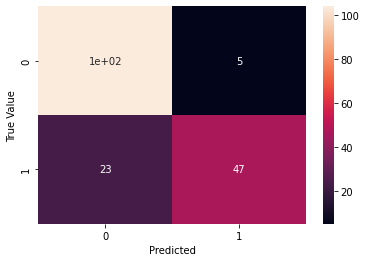

In [43]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [20]:
from sklearn.metrics import recall_score, precision_score, f1_score

# probability the passenger survived if we predict them to survive
precision = precision_score(y_val, y_pred, average='binary')

# probability we predict passenger survive is correct
recall = recall_score(y_val, y_pred, average='binary')

f1 = f1_score(y_val, y_pred)

score = accuracy_score(y_val, y_pred)
print(precision)
print(recall)
print(f1)
print(score)

0.8909090909090909
0.7
0.7839999999999999
0.8491620111731844


In [ ]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,n,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,n,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,n,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,n,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,n,S


In [ ]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3.0,0.369449,0.0,0.0,-0.490783,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,3.0,1.331378,1.0,0.0,-0.507479,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
894,2.0,2.485693,0.0,0.0,-0.453367,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,3.0,-0.207709,0.0,0.0,-0.474005,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
896,3.0,-0.592481,1.0,1.0,-0.401017,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
submission_prediction = final_clf.predict(test_df)

In [58]:
df = pd.DataFrame({"PassengerId": test_index,
                   "Survived": submission_prediction})

print(df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [59]:
df.to_csv("submission8.csv", index=False)

In [22]:
final_clf.save_model("model.json")